<a href="https://colab.research.google.com/github/harshvardhan2804/cloth-prediction-model/blob/main/cloth_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
path = '/content/drive/MyDrive/dataset/clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

fullName = path + '/' + name

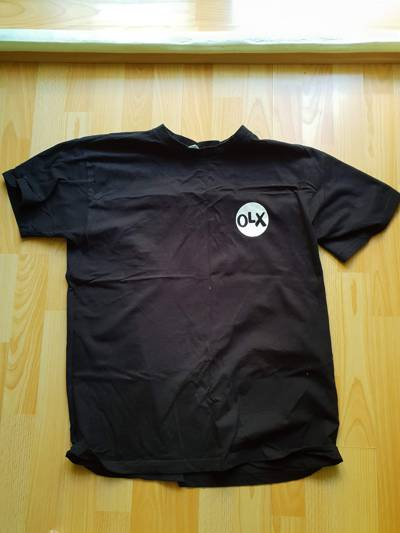

In [ ]:
load_img(fullName)

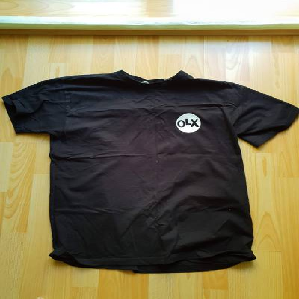

In [ ]:
load_img(fullName, target_size=(299,299))

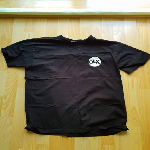

In [ ]:
load_img(fullName, target_size=(150,150))

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
#3 here represents the number of layers in this (red,blue,green)
#299X299 are height X width and weights tell that we have to use a pretrained model imagenet
model = Xception(
    weights = 'imagenet',
    input_shape = (299,299,3)
)

91884032/91884032 [==============================] - 1s 0us/step


In [ ]:
img = load_img(fullName , target_size = (299,299))
x = np.array(img)
x.shape

(299, 299, 3)

In [ ]:
#this code will tell how many images are there in the array
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)
pred = model.predict(X)
pred.shape

1/1 [==============================] - 1s 1s/step


(1, 1000)

In [ ]:
pred[0, :10]

array([0.00032371, 0.00015738, 0.00021349, 0.00015237, 0.00024763,
       0.00030504, 0.00032059, 0.0001475 , 0.00020362, 0.00014927],
      dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
image_size = (150, 150)
batch_size = 32

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "/content/drive/MyDrive/dataset/clothing-dataset-small/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [ ]:
validation_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = validation_gen.flow_from_directory(
    '/content/drive/MyDrive/dataset/clothing-dataset-small/validation',
    seed=1,
    target_size=image_size,
    batch_size=batch_size
)

Found 341 images belonging to 10 classes.


In [ ]:
#include_top means to ignore dense layers and include onlu convulational layer
base_model = Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
)

base_model.trainable = False #freeze the base model as it will remove filters

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vector = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vector)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:
history = model.fit(train_ds, epochs=2, validation_data=val_ds)


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(6, 4))

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(np.arange(10))

plt.legend()


plt.savefig('xception_v1_0_01.svg')

plt.show()

NameError: name 'history' is not defined

<Figure size 600x400 with 0 Axes>

In [ ]:
def make_model(learning_rate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vector)

    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model

In [ ]:
model = make_model(learning_rate=0.001)
history_0_001 = model.fit(train_ds, epochs=2, validation_data=val_ds)

Epoch 1/2
96/96 [==============================] - 316s 3s/step - loss: 1.1366 - accuracy: 0.6183 - val_loss: 0.7324 - val_accuracy: 0.7625
Epoch 2/2
96/96 [==============================] - 299s 3s/step - loss: 0.6319 - accuracy: 0.7813 - val_loss: 0.5931 - val_accuracy: 0.8094


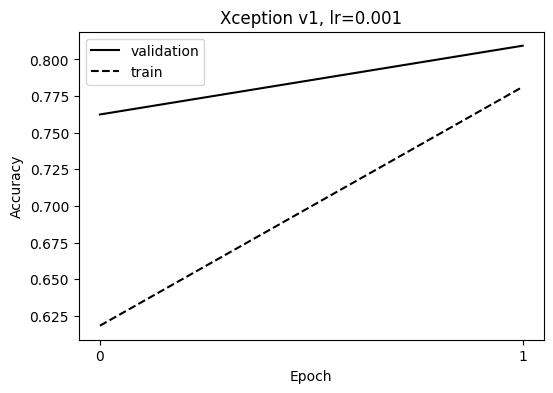

In [ ]:
plt.figure(figsize=(6, 4))

epochs = history_0_001.epoch
val = history_0_001.history['val_accuracy']
train = history_0_001.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.001')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()


plt.savefig('xception_v1_0_001.svg')

plt.show()

In [ ]:
model = make_model(learning_rate=0.001)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_0_001 = model.fit(train_ds, epochs=2, validation_data=val_ds, callbacks=callbacks)

Epoch 1/2
96/96 [==============================] - ETA: 0s - loss: 1.0940 - accuracy: 0.6281

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 316s 3s/step - loss: 1.0940 - accuracy: 0.6281 - val_loss: 0.7133 - val_accuracy: 0.7742
Epoch 2/2
96/96 [==============================] - 312s 3s/step - loss: 0.6262 - accuracy: 0.7888 - val_loss: 0.6382 - val_accuracy: 0.8035


In [ ]:
def make_model(learning_rate , droprate):
  base_model = Xception(
      weights='imagenet',
      input_shape = (150,150,3),
      include_top = False
  )

  base_model.trainable = False

  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs, training=False)
  vector = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(100, activation='relu')(vector)
  drop = keras.layers.Dropout(droprate)(inner)

  outputs = keras.layers.Dense(10)(drop)

  model = keras.Model(inputs, outputs)

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate),
      loss=keras.losses.CategoricalCrossentropy(from_logits=True),
      metrics=["accuracy"],
  )

  return model

In [ ]:
model = make_model(learning_rate=0.001, droprate=0.0)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_0_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_0 = model.fit(train_ds, epochs=2, validation_data=val_ds, callbacks=callbacks)

Epoch 1/2
96/96 [==============================] - ETA: 0s - loss: 0.9672 - accuracy: 0.6714

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 299s 3s/step - loss: 0.9672 - accuracy: 0.6714 - val_loss: 0.6505 - val_accuracy: 0.8123
Epoch 2/2
96/96 [==============================] - 303s 3s/step - loss: 0.5216 - accuracy: 0.8158 - val_loss: 0.6050 - val_accuracy: 0.7947


In [ ]:
validation_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = validation_gen.flow_from_directory(
    '/content/drive/MyDrive/dataset/clothing-dataset-small/validation',
    seed=1,
    target_size=image_size,
    batch_size=batch_size
)

Found 341 images belonging to 10 classes.


In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/dataset/clothing-dataset-small/train',
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [ ]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history = model.fit(train_ds, epochs=3, validation_data=val_ds, callbacks=callbacks)

Epoch 1/3
96/96 [==============================] - 324s 3s/step - loss: 1.1311 - accuracy: 0.6216 - val_loss: 0.7223 - val_accuracy: 0.7537
Epoch 2/3
96/96 [==============================] - 310s 3s/step - loss: 0.7239 - accuracy: 0.7477 - val_loss: 0.6377 - val_accuracy: 0.7830
Epoch 3/3
96/96 [==============================] - 310s 3s/step - loss: 0.6032 - accuracy: 0.7930 - val_loss: 0.5788 - val_accuracy: 0.8152


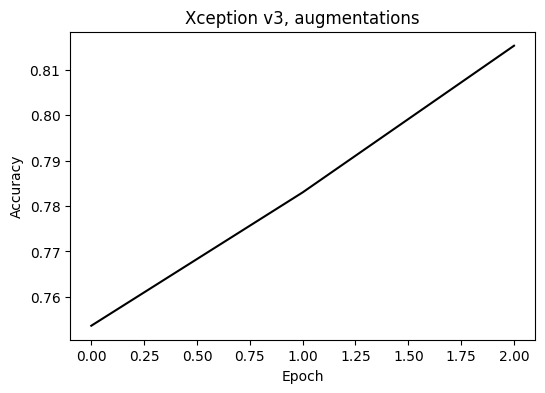

In [ ]:
epochs = history.epoch
accuracy = history.history['val_accuracy']
plt.figure(figsize=(6, 4))

plt.plot(epochs, accuracy, color='black', linestyle='solid')


plt.title('Xception v3, augmentations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.savefig('xception_v3_aug.svg')

plt.show()

In [ ]:
def make_model(learning_rate, droprate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(299, 299, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(299, 299, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    return model


In [ ]:
image_size = (299, 299)
batch_size = 32
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

train_ds = train_gen.flow_from_directory(
    "/content/drive/MyDrive/dataset/clothing-dataset-small/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "/content/drive/MyDrive/dataset/clothing-dataset-small/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v4_large_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_l = model.fit(train_ds, epochs=2, validation_data=val_ds, callbacks=callbacks)

Epoch 1/2
96/96 [==============================] - 1693s 17s/step - loss: 0.8336 - accuracy: 0.7252 - val_loss: 0.4659 - val_accuracy: 0.8446
Epoch 2/2
96/96 [==============================] - 1691s 18s/step - loss: 0.4585 - accuracy: 0.8416 - val_loss: 0.4338 - val_accuracy: 0.8416


Testing of model

In [ ]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

In [ ]:
image_size = (299, 299)

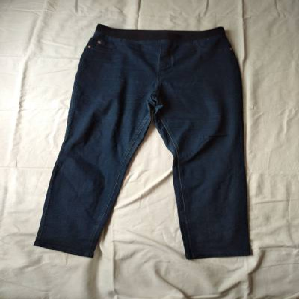

In [ ]:
path = '/content/drive/MyDrive/dataset/clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))
img

In [ ]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)
pred[0]

1/1 [==============================] - 2s 2s/step


array([-2.8627264 , -2.7954922 , -1.8724046 , -0.17236862,  7.9115486 ,
       -0.8755718 , -3.7780147 ,  2.6287022 , -3.835938  , -2.0637674 ],
      dtype=float32)

In [ ]:
pred[0].argmax()


4

In [ ]:
labels[pred[0].argmax()]


'pants'